Dominican Republic

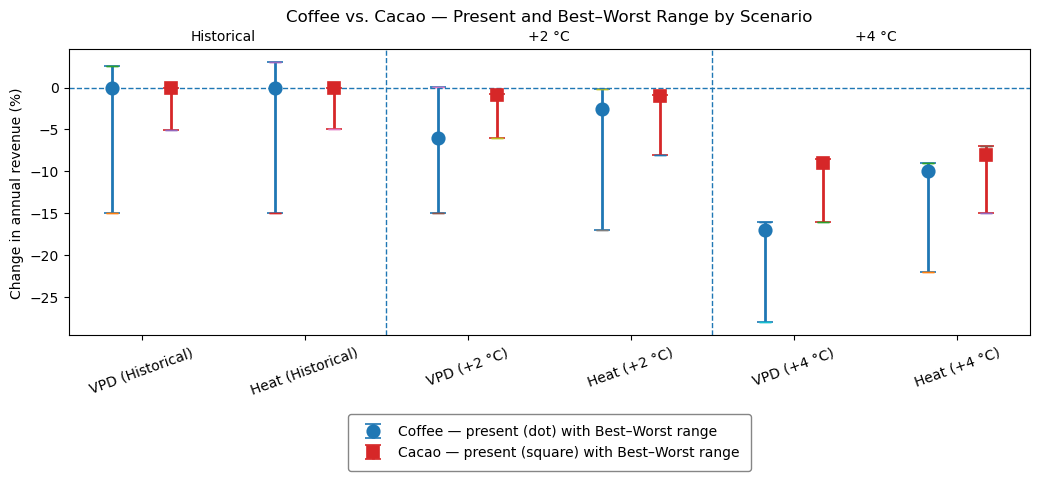

In [ ]:
# Updated plot per user's requests:
# Still no seaborn, no explicit colors, and one clean figure.

from utils_CB import  OUTPUT_DIR

import matplotlib.pyplot as plt
import numpy as np

# Scenarios grouped as: Historical | +2 °C | +4 °C, each with VPD and Heat
scenarios = [
    "VPD (Historical)",
    "Heat (Historical)",
    "VPD (+2 °C)",
    "Heat (+2 °C)",
    "VPD (+4 °C)",
    "Heat (+4 °C)",
]

# Coffee data (percent changes)
coffee_present = np.array([0.0, 0.0, -6.0, -2.6, -17.0, -10.0])
coffee_worst   = np.array([-15.0, -15.0, -15.0, -17.0, -28.0, -22.0])
coffee_best    = np.array([  2.6,   3.0,   0.1,  -0.2, -16.0,  -9.0])

# Cacao data (percent changes)
cacao_present = np.array([0.0, 0.0, -0.9, -1.0, -9.0, -8.0])
cacao_worst   = np.array([-5.1, -4.9, -6.0, -8.0, -16.0, -15.0])
cacao_best    = np.array([0.0,  0.0, -0.8, -0.9, -8.5,  -7.0])

# X positions
x = np.arange(len(scenarios))
offset = 0.18

# Helper to compute asymmetric errors around "present"
def asym_err(present, worst, best):
    lower = present - worst   # distance down to worst
    upper = best - present    # distance up to best
    lower = np.maximum(lower, 0.0)
    upper = np.maximum(upper, 0.0)
    return [lower, upper]

coffee_err = asym_err(coffee_present, coffee_worst, coffee_best)
cacao_err  = asym_err(cacao_present,  cacao_worst,  cacao_best)

# Build figure
fig, ax = plt.subplots(figsize=(10.5, 5.2))

# Coffee: error bars + present point (bigger markersize)
ax.errorbar(
    x - offset, coffee_present, yerr=coffee_err,
    fmt='o', markersize=9, capsize=6, linewidth=2, markeredgewidth=1.2,
    label="Coffee — present (dot) with Best–Worst range"
)

# Add short tick marks at the ends of the Coffee ranges for readability
for xi, p, wl, wu in zip(x - offset, coffee_present, coffee_err[0], coffee_err[1]):
    ax.plot([xi, xi], [p - wl, p - wl], marker='_', markersize=8)
    ax.plot([xi, xi], [p + wu, p + wu], marker='_', markersize=8)

# Cacao: error bars + present point (square, bigger markersize)
ax.errorbar(
    x + offset, cacao_present, yerr=cacao_err,
    fmt='s', markersize=9, capsize=6, linewidth=2, markeredgewidth=1.2,
    label="Cacao — present (square) with Best–Worst range"
)

# Add short tick marks at the ends of the Cacao ranges for readability
for xi, p, wl, wu in zip(x + offset, cacao_present, cacao_err[0], cacao_err[1]):
    ax.plot([xi, xi], [p - wl, p - wl], marker='_', markersize=8)
    ax.plot([xi, xi], [p + wu, p + wu], marker='_', markersize=8)

# Zero line
ax.axhline(0, linestyle='--', linewidth=1)

# Group separators (dashed vertical lines) between Historical | +2 °C | +4 °C
ax.axvline(1.5, linestyle='--', linewidth=1)
ax.axvline(3.5, linestyle='--', linewidth=1)

# Group labels above the x-axis
ax.text(0.5, 1.02, "Historical", transform=ax.get_xaxis_transform(), ha='center', va='bottom')
ax.text(2.5, 1.02, "+2 °C",      transform=ax.get_xaxis_transform(), ha='center', va='bottom')
ax.text(4.5, 1.02, "+4 °C",      transform=ax.get_xaxis_transform(), ha='center', va='bottom')

# X-axis labels
ax.set_xticks(x)
ax.set_xticklabels(scenarios, rotation=20)

# Labels and title (raise title with padding)
ax.set_ylabel("Change in annual revenue (%)")
ax.set_title("Coffee vs. Cacao — Present and Best–Worst Range by Scenario", pad=20)

# Legend put below the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=1, frameon=True, fancybox=True, framealpha=0.95, edgecolor="0.5", facecolor="white", borderpad=0.8, handlelength=2)

fig.tight_layout()
plt.show()

# Save the figure in the results folder OUTPUT_DIR
fig.savefig(f"{OUTPUT_DIR}/coffee_cacao_yield_changes.png", dpi=300, bbox_inches='tight')